In this code, I will be determining the orbits of many Sun analogues in a ring 8kpc from the center of M33. I will then be simulating how their orbits will change through time as M31 and the Milky Way merge to determine the most likely fate of these Sun-analogues. 

For the first part of the assignment, I am going to determine how the Sun analogues are orbiting around the center of M33 at current time. Once I determine their configuration, I will be able to plot how they are going to move with time.

In [7]:
#first I will load the packs that I will be needing
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
#then I am loading previous code that I may need
from ReadFile import Read
from CenterOfMass import CenterOfMass
from OrbitCOM import OrbitCOM

In [3]:
#now we are going to define a function to calculate the orbits of different
#sun analogues
class sunanorbits:
    def __init__(self,filename,ptype):
        #inputs: filename - name of the input file
                #ptype - the type of particle. In this code, ptype = 1
        #outputs:
    
        #We need to define the file that the code will be pulling data from
        filename = 'M33_000.txt'
        self.time, self.total, self.data = Read(filename)
        
        #Here we define the center of mass of M33
        M33COM = CenterOfMass(filename,2)
        self.pos = M33COM.COM_P(0.1,4).value
        self.vel = M33COM.COM_V(self.pos[0],self.pos[1],self.pos[2]).value
        
        #create an array to store indexes of particles of desired Ptype                                                
        self.index = np.where(self.data['type'] == 2)
        # store the mass, positions, velocities of only the particles of the given type                                
        self.m = self.data['m'][self.index]
        self.x = self.data['x'][self.index]
        self.y = self.data['y'][self.index]
        self.z = self.data['z'][self.index]
        self.vx = self.data['vx'][self.index]
        self.vy = self.data['vy'][self.index]
        self.vz = self.data['vz'][self.index]
        
        #M33 does not have a bulge
        #so the mass we are looking at is disk mass (ptype=1)
        #since halo mass (ptype=0) is all dark matter
        
    def relative_mag(orbit1, orbit2): 
        # Input: 3D vector 1 , 3D vector 2
        # returns the magnitude of the relative position and velocities
        #we will need this function to define the distance we need each particle
        #to be to be a solar analogue
        posdiff =  np.sqrt( (orbit1['x']-orbit2['x'])**2 + (orbit1['y']-orbit2['y'])**2 + (orbit1['z']-orbit2['z'])**2)
        #veldiff =  np.sqrt( (orbit1['vx']-orbit2['vx'])**2 + (orbit1['vy']-orbit2['vy'])**2 + (orbit1['vz']-orbit2['vz'])**2)
        return posdiff
    

        
        #now we plot the points to see their position
        fig = plt.figure(figsize=(10,10))
        plt.title('The Position of Solar Analogues on the XY Plane')
        plt.ylabel('Y Position [kpc]')
        plt.xlabel('X Position [kpc]')
        
        plt.scatter(M33anx,M33any,color='aquamarine')
        
        plt.xlim(-50,50)
        plt.ylim(-50,50)
        
    def parposxz(self,filename):
        #input: filename - the name of the file with M33's data
        #output: positions of the solar analogue particles on the xz plane
        
        #I'm just going to repeat the above for the particles in the xz plane
        time,total,data = Read(filename)
        
        #now we need to get the center of mass so that we can pick particles 8kpc away from the center of mass
        M33COM = CenterOfMass(filename,2)
        pos = M33COM.COM_P(0.1,4).value
        vel = M33COM.COM_V(self.pos[0],self.pos[1],self.pos[2]).value
        
        #now we define an index to sort out the particles we want
        M33diff = relative_mag(data,pos)
        index = np.where(self.data['type'] == 2.) & (abs(M33diff - 8) < 0.1)
        
        #now we can define the particles that we are looking at for this simulation
        M33anx = M33COM.x[index] - pos[0].value
        M33anz = M33COM.z[index] - pos[2].value
        
        #now we plot the points to see their position
        fig = plt.figure(figsize=(10,10))
        plt.title('The Position of Solar Analogues on the XZ Plane')
        plt.ylabel('Z Position [kpc]')
        plt.xlabel('X Position [kpc]')
        
        plt.scatter(M33anx,M33anz,color='aquamarine')
        
        plt.xlim(-50,50)
        plt.ylim(-50,50)
        
    def parposyz(self,filename):
        #input: filename - the name of the file with M33's data
        #output: positions of the solar analogue particles on the yz plane
        
        #I'm just going to repeat the above for the particles in the yz plane
                time,total,data = Read(filename)
        
        #now we need to get the center of mass so that we can pick particles 8kpc away from the center of mass
        M33COM = CenterOfMass(filename,2)
        pos = M33COM.COM_P(0.1,4).value
        vel = M33COM.COM_V(self.pos[0],self.pos[1],self.pos[2]).value
                
        #now we define an index to sort out the particles we want
        M33diff = relative_mag(data,pos)
        index = np.where(self.data['type'] == 2.) & (abs(M33diff - 8) < 0.1)
        
        #now we can define the particles that we are looking at for this simulation
        M33any = M33COM.y[index] - pos[1].value
        M33anz = M33COM.z[index] - pos[2].value
        
        #now we plot the points to see their position
        fig = plt.figure(figsize=(10,10))
        plt.title('The Position of Solar Analogues on the YZ Plane')
        plt.ylabel('Z Position [kpc]')
        plt.xlabel('Y Position [kpc]')
        
        plt.scatter(M33any,M33anz,color='aquamarine')
        
        plt.xlim(-50,50)
        plt.ylim(-50,50)

IndentationError: unindent does not match any outer indentation level (<ipython-input-3-9e3913d8b707>, line 116)

In [22]:
def parpos(filename):
    #input: filename - the name of the file with M33's data
    #output: positions of the solar analogue particles on the xy plane
    
    #now we are going to take the information from our __init__ code
    #and determine the mass, positions, and velocity of particles
    #8 kpc away from the center of M33
    #time,total,data = Read(filename)
        
    #now we need to get the center of mass so that we can pick particles 8kpc away from the center of mass
    #I defined the COM in my __init__ function but I don't know how to recall it
    #so I'm just going to do it again.
    M33COM = CenterOfMass(filename,2)
    pos = M33COM.COM_P(0.1,4)
    vel = M33COM.COM_V(pos[0],pos[1],pos[2]).value
    pos = pos.value    
    #now we define an index to sort out the particles we want
    M33diff = np.sqrt((M33COM.x-pos[0])**2 + (M33COM.y-pos[1])**2 + (M33COM.z-pos[2])**2)
    index = np.where((abs(M33diff - 8) < 0.1))
        
    #now we can define the particles that we are looking at for this simulation
    M33anx = M33COM.x[index] - pos[0]
    M33any = M33COM.y[index] - pos[1]
    M33anz = M33COM.z[index] - pos[2]
    return M33anx,M33any,M33anz

In [23]:
x,y,z = parpos('M33_000.txt')

(-50, 50)

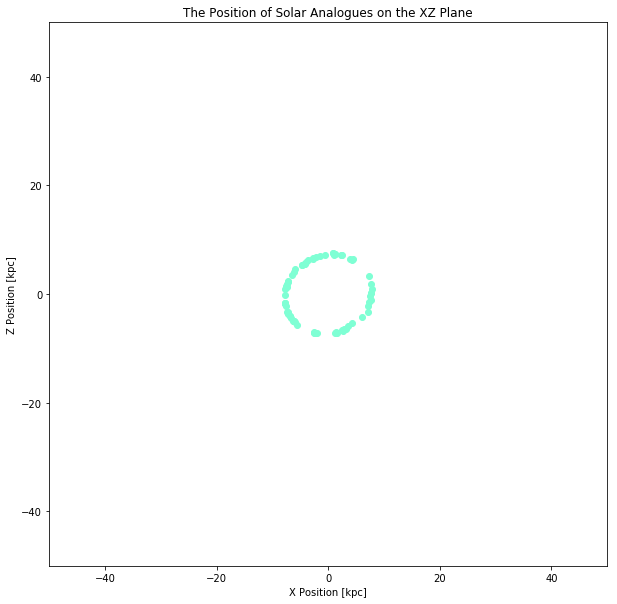

In [25]:
#now we plot the points to see their position
fig = plt.figure(figsize=(10,10))
plt.title('The Position of Solar Analogues on the XZ Plane')
plt.ylabel('Z Position [kpc]')
plt.xlabel('X Position [kpc]')
        
plt.scatter(x,z,color='aquamarine')
        
plt.xlim(-50,50)
plt.ylim(-50,50)